In [1]:
import sys
from google.colab import drive, files
drive.mount('/content/gdrive')

sys.path.insert(0,'/content/gdrive/My Drive/Colab Notebooks/src')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pip install keras --upgrade
!pip install git+https://github.com/AI-Guru/ngdlm.git

^C
Operation cancelled by user
  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-37x6gqz0
^C


In [6]:
%load_ext autoreload
%autoreload 1
%matplotlib inline
import pickle
import glob2 as glob

from main_functions import VAE_model, calculate_distances
from sklearn.model_selection import train_test_split
from ngdlm import utils as ngdlutils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
### Initiate the model architecture
vae = VAE_model.define_VAE_architecture(latent_dim = 10)

### Compile the model
vae.compile(
    optimizer = 'adadelta',
    loss = 'binary_crossentropy'
)


In [0]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', \
           'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r',\
           't']

The letter: A
Epoch: 5
loss        [0.2702425349084184]
val_loss    [0.2614981113253413]
Name: 3, dtype: object
Epoch: 10
loss         [0.2486175598239736]
val_loss    [0.24917425094424067]
Name: 8, dtype: object
Epoch: 15
loss        [0.2200162493633329]
val_loss    [0.2165081444624308]
Name: 13, dtype: object
Epoch: 20
loss        [0.19914171170862868]
val_loss     [0.2102647149885023]
Name: 18, dtype: object
Epoch: 25
loss         [0.1890718983200223]
val_loss    [0.20306287665624875]
Name: 23, dtype: object
Epoch: 30
loss        [0.17829209789888037]
val_loss    [0.19371716637869138]
Name: 28, dtype: object
Epoch: 35
loss         [0.1660601122896012]
val_loss    [0.18441502669373075]
Name: 33, dtype: object
Epoch: 40
loss        [0.15543907860440198]
val_loss     [0.1859050836112048]
Name: 38, dtype: object
Epoch: 45
loss        [0.14688716798308765]
val_loss    [0.21332609814566536]
Name: 43, dtype: object
Epoch: 50
loss        [0.13849287790344844]
val_loss     [0.180360249570898

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The letter: V
Epoch: 5
loss        [0.09147061330008832]
val_loss    [0.10982505010591971]
Name: 3, dtype: object
Epoch: 10
loss        [0.07706780762192332]
val_loss    [0.12379200112175297]
Name: 8, dtype: object
Break after 13 epochs.
The letter: W
Epoch: 5
loss         [0.1357326841700199]
val_loss    [0.15259041617045532]
Name: 3, dtype: object
Epoch: 10
loss        [0.11886650105181815]
val_loss    [0.15550075149213946]
Name: 8, dtype: object
Epoch: 15
loss        [0.10746275867516678]
val_loss    [0.16059133531274022]
Name: 13, dtype: object
Break after 16 epochs.
The letter: X
Epoch: 5
loss        [0.12026713380258378]
val_loss    [0.15249835599113154]
Name: 3, dtype: object
Epoch: 10
loss         [0.0991088878108214]
val_loss    [0.14252962192168106]
Name: 8, dtype: object
Epoch: 15
loss        [0.08802508032076979]
val_loss    [0.14681842198243011]
Name: 13, dtype: object
Break after 17 epochs.
The letter: Y
Epoch: 5
loss        [0.12226073127495099]
val_loss    [0.1561110728

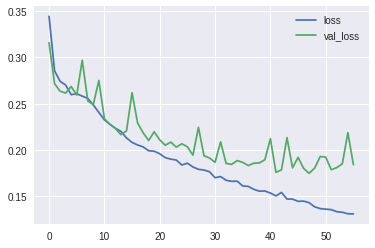

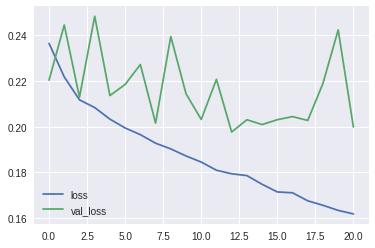

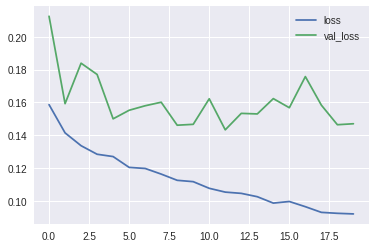

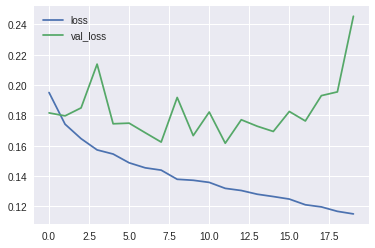

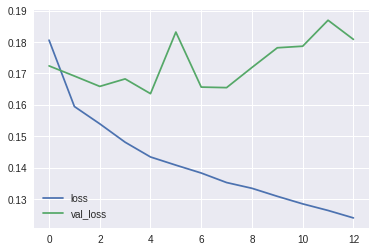

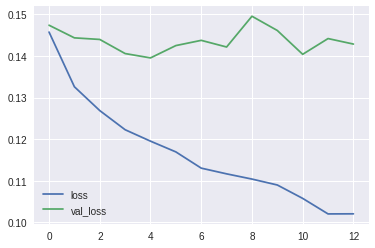

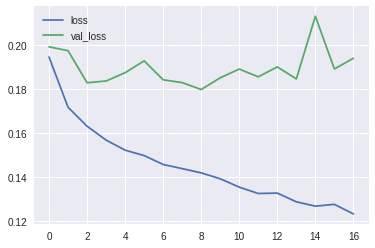

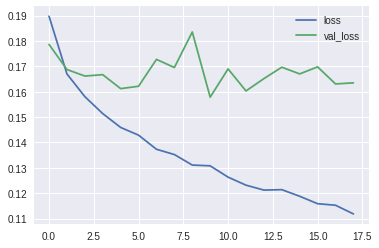

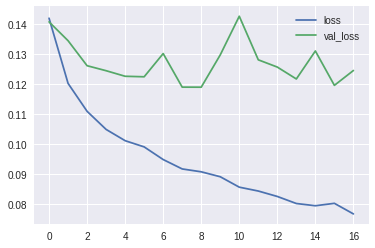

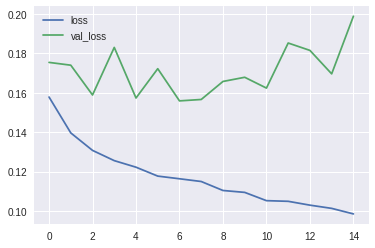

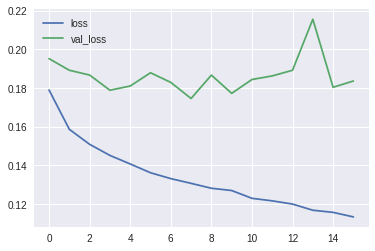

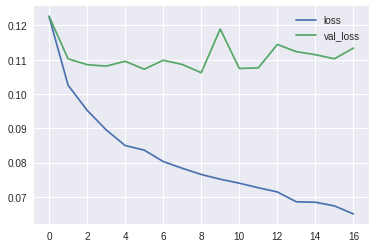

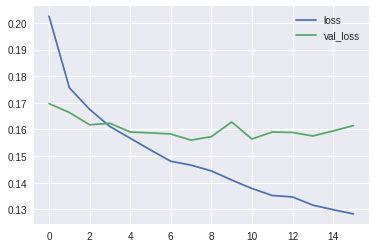

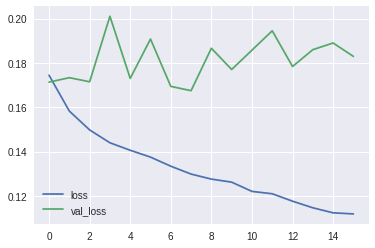

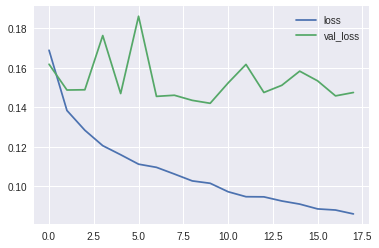

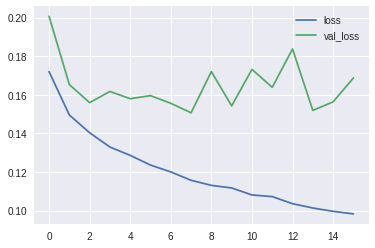

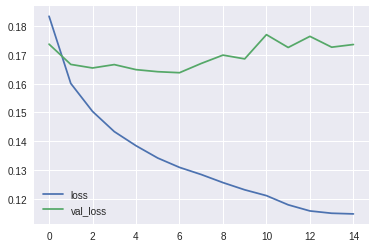

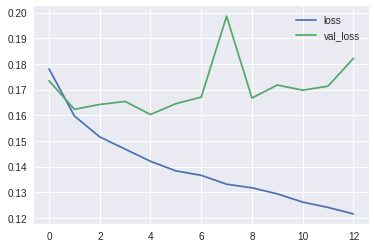

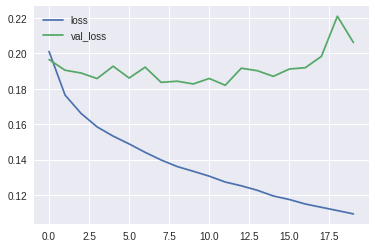

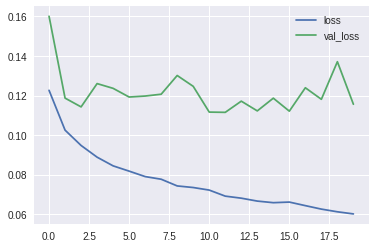

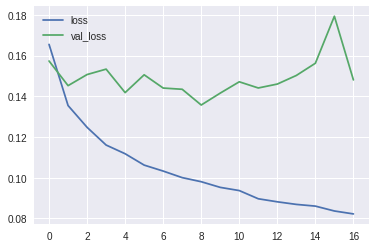

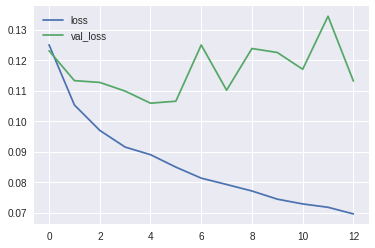

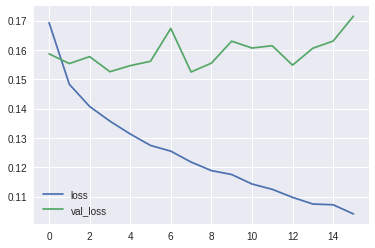

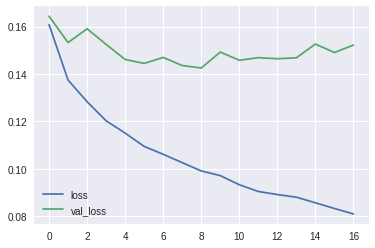

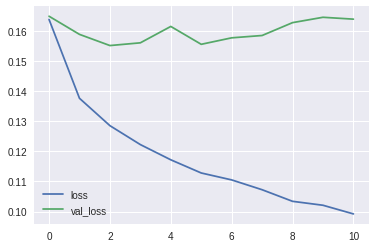

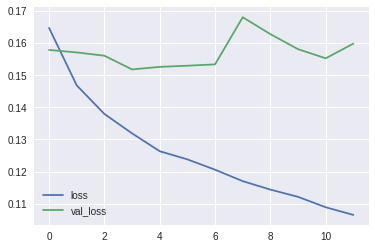

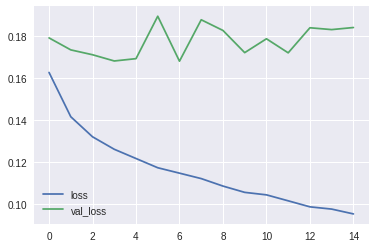

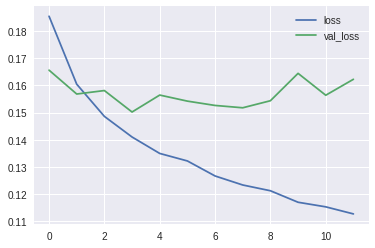

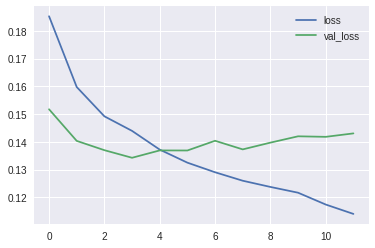

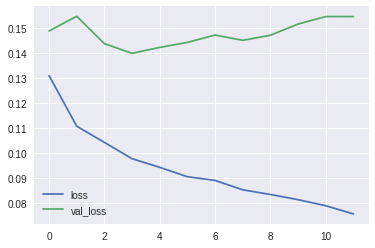

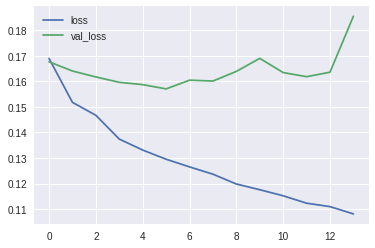

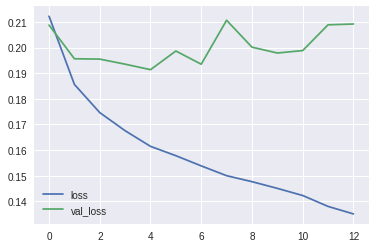

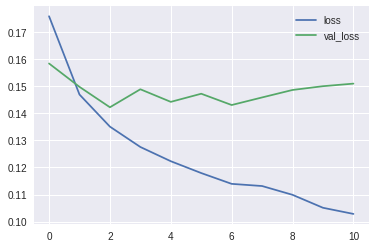

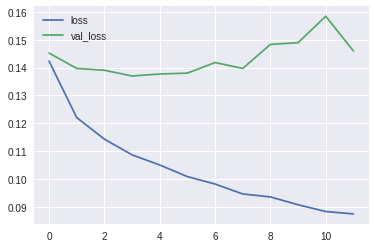

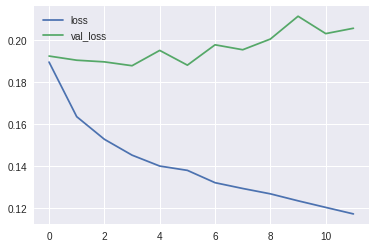

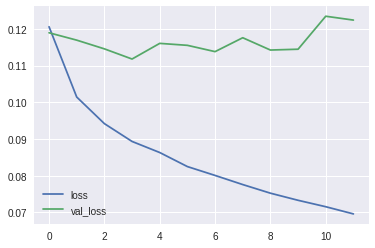

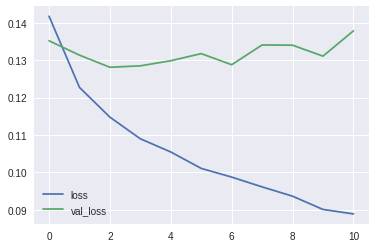

In [6]:
for letter in letters:
  
  print("The letter: " + str(letter))
  
  ### Reinitialize the model for the new letter
  VAE_model.reset_weights(vae) 

  ### Import data

  with open(f'/content/gdrive/My Drive/Colab Notebooks/data/letters/{letter}.p', 'rb') as file:
    norm_imgs = np.array(pickle.load(file))
  norm_imgs = norm_imgs/255.0
  norm_imgs = norm_imgs.reshape(-1, 128, 128, 1)

  x_train, x_test, _, _ = train_test_split(norm_imgs, norm_imgs,
                                     test_size=0.2, shuffle=True, random_state=0)
  
  ### Train the model
  vae = VAE_model.train_VAE_model(vae, train_data=x_train, test_data=x_test,
                                  max_loop=100, verbose=0)
  
  #save encodings
  pickle.dump(vae.encoder.predict(norm_imgs)[0],open(f'/content/gdrive/My Drive/Colab Notebooks/models/encodings/{letter}_encoding.p',"wb"))

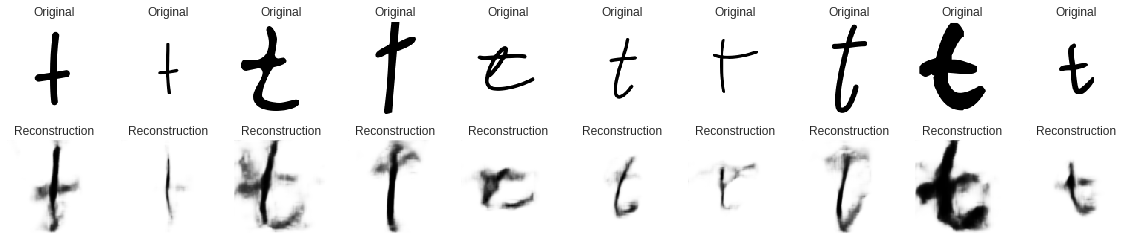

In [7]:
#ngdlutils.render_image_reconstructions(vae, x_test[20:30])

In [0]:
paths = glob.glob("/content/gdrive/My Drive/Colab Notebooks/models/encodings/*p")

#Reload all encodings
encodings = []
for path in paths:
    encodings.append(pickle.load(open(path,mode="rb"))[:300,:])
    #TODO: 300 temporary - change this after having recalculate the latent spaces.
encodings = np.array(encodings)
print("loaded all encodings. Shape: " + str(encodings.shape))

In [7]:
#calculate a pairwise distance matrix between fonts on top of the encodings
distance_matrix = calculate_distances.aggregate(encodings=encodings, letter_weights=None)

NameError: name 'encodings' is not defined

In [ ]:
# exemplarily visualize the distances to the first font
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(distance_matrix[0,:],bins=30)

plt.xlabel('aggregate distance')
plt.ylabel('frequency')
plt.title('aggregate distances in relation to the first font')
plt.axis([300, 600, 0, 100])
plt.show()